# Лабораторна робота №5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%precision 5
np.set_printoptions(suppress=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_friedman2

In [11]:
#генерація датасету
friedman_arr = make_friedman2(n_samples=1000, random_state=0)
friedman_df = pd.DataFrame(friedman_arr[0], columns=['x1', 'x2', 'x3', 'x4'])
friedman_df['y'] = friedman_arr[1]

In [12]:
friedman_df

,x1,x2,x3,x4,y
0,54.881350,1294.017209,0.602763,6.448832,781.914458
1,42.365480,1180.814530,0.437587,9.917730,518.443136
2,96.366276,752.064577,0.791725,6.288949,603.175873
3,56.804456,1637.744458,0.071036,1.871293,129.465874
4,2.021840,1485.854949,0.778157,9.700121,1156.229758
...,...,...,...,...,...
995,43.216661,717.459924,0.558138,1.763440,402.766140
996,4.034602,960.616111,0.028501,1.595520,27.673917
997,37.634146,226.587735,0.385470,3.417505,95.104410
998,18.777030,786.760083,0.119904,4.496394,96.185915


Побудуємо точкові графіки, на яких y залежить від xi, xk (i!=k; i,k є {1, 2, 3, 4})

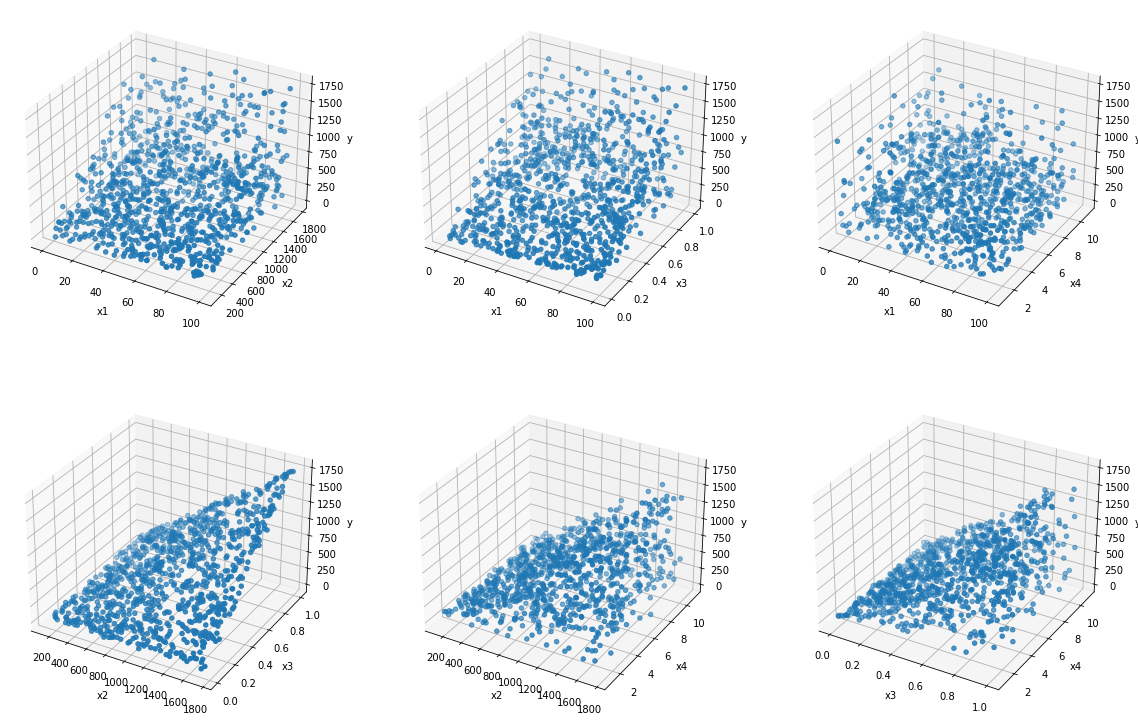

In [13]:
fig = plt.figure(tight_layout=True, figsize=(20, 20))
gs = gridspec.GridSpec(3, 3)

ax = fig.add_subplot(gs[0, 0], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x2, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[0, 1], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x3, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x3")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[0, 2], projection="3d")
ax.scatter(friedman_df.x1, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x1")
ax.set_ylabel("x4")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 0], projection="3d")
ax.scatter(friedman_df.x2, friedman_df.x3, friedman_df.y)
ax.set_xlabel("x2")
ax.set_ylabel("x3")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 1], projection="3d")
ax.scatter(friedman_df.x2, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x2")
ax.set_ylabel("x4")
ax.set_zlabel("y")

ax = fig.add_subplot(gs[1, 2], projection="3d")
ax.scatter(friedman_df.x3, friedman_df.x4, friedman_df.y)
ax.set_xlabel("x3")
ax.set_ylabel("x4")
ax.set_zlabel("y")

plt.show()

Бачимо щось на кшталт сплайнів, тому можна припустити, що у має показниковий розподіл

In [14]:
#розіб'ємо набір на тренувальний, валідаційний та тестовий (можливо буде необхідно скористатися командою pip install fast_ml)

from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(friedman_df, target = 'y', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

#функція для підрахунку метрик моделей

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

def metrics(X, y, model):
    print('R^2 : ', r2_score(y, model.predict(X)))
    print('RMSE: ', np.sqrt(mean_squared_error(y, model.predict(X))))
    print('MAPE: ', mean_absolute_percentage_error(y, model.predict(X)))
    print('MAE : ', mean_absolute_error(y, model.predict(X)))

GradientBoostingRegressor не передбачає можливості вибрати базовий естіматор, але дефолтне дерево рішень для порівняння якості дерева та моделі, отриманої за допомогою бустінгу

In [24]:
%%time
print('----------------------------')
dec_tr_model = DecisionTreeRegressor(max_depth=3)
dec_tr_model.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, dec_tr_model)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, dec_tr_model)
print('----------------------------')

----------------------------
R^2 :  0.8935098447416869
RMSE:  123.63218941165255
MAPE:  0.38481782347610616
MAE :  94.54313004838993
----------------------------
R^2 :  0.8682729993973757
RMSE:  136.9309284953333
MAPE:  0.310177516935536
MAE :  103.75103455401779
----------------------------
Wall time: 52.2 ms


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
%%time
gr1 = GradientBoostingRegressor()
gr1.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, gr1)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, gr1)
print('----------------------------')

Train set:
R^2 :  0.9986477884136997
RMSE:  13.931540973406934
MAPE:  0.04561970292566301
MAE :  10.407237116131858
----------------------------
Valid set:
R^2 :  0.995244378262977
RMSE:  26.017634189570725
MAPE:  0.07164596012003419
MAE :  19.85652837724738
----------------------------
Wall time: 221 ms


Бачимо, що навіть базовий GradientBoostingRegressor дає дуже високу якість, як на тренувальних, так і на валідаційних даних. Розглянемо рiзнi значення learning_rate, subsample, max_features, loss.

In [43]:
%%time
gr2 = GradientBoostingRegressor(learning_rate=0.1, subsample=0.5, max_features='sqrt', loss='quantile')
gr2.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, gr2)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, gr2)
print('----------------------------')

Train set:
R^2 :  0.8754939687226628
RMSE:  133.68172011603556
MAPE:  0.5923166431544188
MAE :  85.93168163981902
----------------------------
Valid set:
R^2 :  0.8937778359244997
RMSE:  122.96222807963264
MAPE:  0.47370815941515537
MAE :  80.18686971924897
----------------------------
Wall time: 528 ms


In [44]:
%%time
gr3 = GradientBoostingRegressor(learning_rate=0.3, subsample=0.5, max_features=2, loss='huber')
gr3.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, gr3)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, gr3)
print('----------------------------')

Train set:
R^2 :  0.9968170542613718
RMSE:  21.37427770584692
MAPE:  0.06432975565960232
MAE :  15.39900705091435
----------------------------
Valid set:
R^2 :  0.9841574825270384
RMSE:  47.487165657141475
MAPE:  0.10814794550159258
MAE :  35.08580234522531
----------------------------
Wall time: 694 ms


In [45]:
%%time
gr4 = GradientBoostingRegressor(learning_rate=0.5, subsample=1, max_features='log2', loss='quantile')
gr4.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, gr4)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, gr4)
print('----------------------------')

Train set:
R^2 :  0.9390899427910346
RMSE:  93.50209330185022
MAPE:  0.34979980743926126
MAE :  65.39829861499553
----------------------------
Valid set:
R^2 :  0.9220394062900493
RMSE:  105.34203901330969
MAPE:  0.3219618110313448
MAE :  76.98926119913011
----------------------------
Wall time: 413 ms


In [47]:
%%time
gr5 = GradientBoostingRegressor(learning_rate=50)
gr5.fit(X_train, y_train)
print('Train set:')
metrics(X_train, y_train, gr5)
print('----------------------------')
print('Valid set:')
metrics(X_valid, y_valid, gr5)
print('----------------------------')

Train set:
R^2 :  -inf
RMSE:  inf
MAPE:  1.2597889605237446e+162
MAE :  2.811628072640329e+164
----------------------------
Valid set:
R^2 :  -inf
RMSE:  inf
MAPE:  1.4200882962588762e+162
MAE :  6.321045835057684e+164
----------------------------
Wall time: 270 ms


За рахунок виского показника learning_rate якість моделі сильно падає, проте при низькому теж можна спостерігати трохи гіршу якісь, найкращим є навчання не на повній вибірці, а на якійсь її частині (параметр subsample), функцією втрат краще обирати loss

Бачимо, що перша модель давала найкращі результати, тому повернемося до неї та знайдемо найкращу кількість естіматорів

In [51]:
%%time
dctr_of_scores = {}
for i in range(5, 201, 5):
    model = GradientBoostingRegressor(random_state=0, n_estimators=i)
    model.fit(X_train, y_train)
    dctr_of_scores[i] = [r2_score(y_train, model.predict(X_train)), r2_score(y_train, dec_tr_model.predict(X_train))]

Wall time: 8.47 s


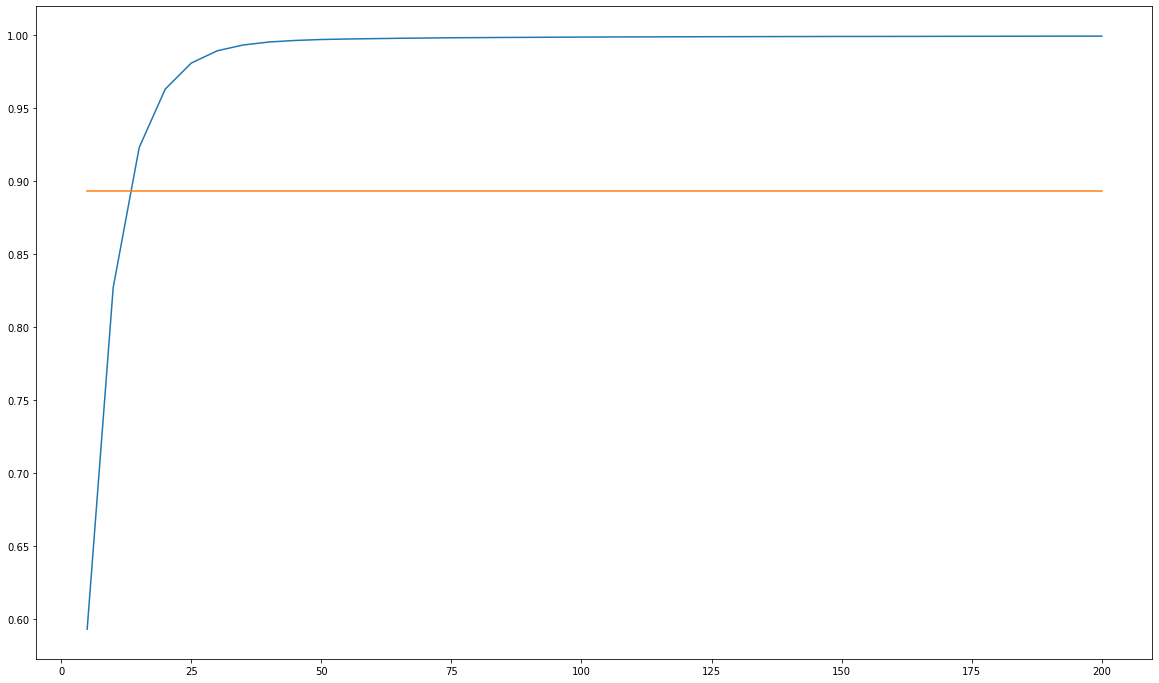

In [52]:
plt.figure(figsize=(20, 12))
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 0])
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 1])
plt.show()

Бачимо, що якість моделі зростає від збільшення кількості естіматорів. Побудуємо такоє такий самий графік, але для валідаційних наборів

In [54]:
%%time
dctr_of_scores = {}
for i in range(5, 201, 5):
    model = GradientBoostingRegressor(random_state=0, n_estimators=i)
    model.fit(X_train, y_train)
    dctr_of_scores[i] = [r2_score(y_valid, model.predict(X_valid)), r2_score(y_valid, dec_tr_model.predict(X_valid))]

Wall time: 8.56 s


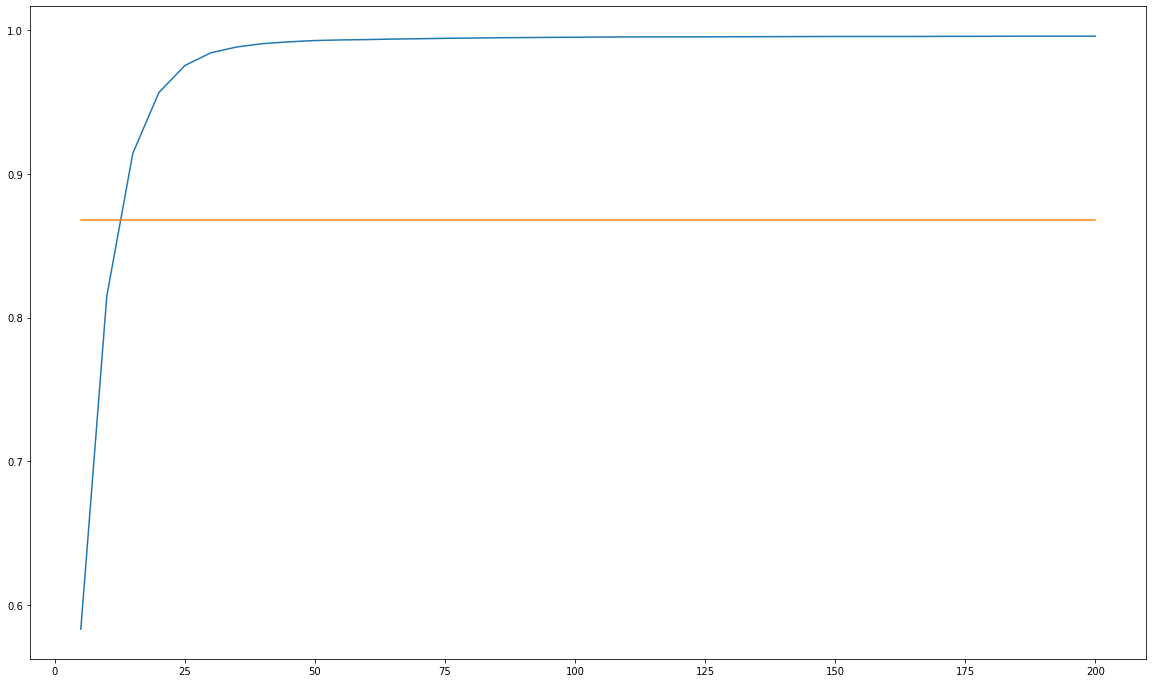

In [55]:
plt.figure(figsize=(20, 12))
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 0])
sns.lineplot(np.array(list(dctr_of_scores.keys())), np.array(list(dctr_of_scores.values()))[:, 1])
plt.show()

Ситуація аналогічна, тому візьмемо в якості n_estimators 50, бо на цій відмітці зростання "застиває". За рахунок теореми Чебишова можна стверджувати, що на цьому моменті якість моделі перестає залежати від n

За допомогою решітчатого пошуку підберемо найкращу модель на валідаційному наборі даних по метриці r2

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'loss' : ['squared_error', 'huber', 'quantile'],
    'learning_rate' : [0.001, 0.01, 0.1, 1],
    'subsample' : [0.25, 0.5, 1],
    'max_features' : ['log2', 'sqrt', 'auto']
}

In [58]:
%%time
best_model = GradientBoostingRegressor(n_estimators=50, random_state=0)
best_model = GridSearchCV(best_model, parameters, scoring='r2', cv=4)
best_model.fit(X_valid, y_valid)

Wall time: 1min 11s


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(n_estimators=50,
                                                 random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['squared_error', 'huber', 'quantile'],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'subsample': [0.25, 0.5, 1]},
             scoring='r2')

In [59]:
#найкраща модель
best_model.best_estimator_

GradientBoostingRegressor(loss='huber', max_features='auto', n_estimators=50,
                          random_state=0, subsample=0.5)

In [61]:
#метрики найкращої моделі
print('Train:----------------------')
metrics(X_train, y_train, best_model.best_estimator_)
print('----------------------------')
print('Valid:----------------------')
metrics(X_valid, y_valid, best_model.best_estimator_)
print('----------------------------')
print('Test:-----------------------')
metrics(X_test, y_test, best_model.best_estimator_)
print('----------------------------')

Train:----------------------
R^2 :  0.9840280077562837
RMSE:  47.88024626462302
MAPE:  0.1933450405497002
MAE :  34.31448971056859
----------------------------
Valid:----------------------
R^2 :  0.9941402058226052
RMSE:  28.88054153623532
MAPE:  0.0708975483682345
MAE :  18.121302270641873
----------------------------
Test:-----------------------
R^2 :  0.9809491458754976
RMSE:  53.49686565935525
MAPE:  0.503437026862821
MAE :  38.15696502238408
----------------------------


Бачимо, що метрики якості високі і перенавчання практично відсутнє

# Висновки

В ході виконання лабораторної роботи було побудовано ансамблі GradientBoosting моделей регресії засобами бібліотеки sklearn на згенерованому наборі даних. Алгоритм є дуже швидким та дає високу якість, не потребує попередньої обробки даних, бо в його основі лежать дерева, тому підходить для широкого класу задач

Загалом модель GradientBoosting показує себе краще, ніж звичайне дерево, використовуючи "під капотом" закон великих чисел як математичне підгрунття для своєї потужності.